#### hello boys

In [68]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import holidays

In [69]:
df=pd.read_csv('./data/dehli_energy.csv')
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [71]:
df.describe()   

,Unnamed: 0,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
count,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,392900.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393438.000000
mean,196719.500000,3960.736469,25.527913,16.338046,63.435767,163.777081,7.854550,1008.932695,2022.487129,6.446991,15.745171,11.184371,27.354959,3960.746273
std,113576.489292,1300.473773,7.981563,7.377440,24.850663,116.888397,5.664314,6.902759,1.110587,3.412654,8.783091,6.797501,17.223877,1299.545642
min,0.000000,1302.080000,4.000000,-8.600000,5.000000,0.000000,0.000000,989.600000,2021.000000,1.000000,1.000000,0.000000,0.000000,1307.680000
25%,98359.750000,3074.900000,20.000000,10.400000,44.000000,50.000000,5.400000,1003.000000,2021.000000,3.000000,8.000000,5.000000,10.000000,3075.861667
50%,196719.500000,3832.320000,27.000000,15.400000,67.000000,160.000000,7.600000,1009.000000,2022.000000,6.000000,16.000000,11.000000,25.000000,3831.728333
75%,295079.250000,4870.465000,31.000000,23.900000,84.000000,270.000000,11.200000,1015.000000,2023.000000,9.000000,23.000000,17.000000,40.000000,4869.906667
max,393439.000000,8631.530000,46.400000,30.300000,100.000000,360.000000,63.000000,1027.000000,2024.000000,12.000000,31.000000,23.000000,55.000000,8598.126667


In [72]:
df.isnull().sum()   

Unnamed: 0        0
datetime          0
Power demand      0
temp              0
dwpt              0
rhum              0
wdir            540
wspd              0
pres              0
year              0
month             0
day               0
hour              0
minute            0
moving_avg_3      2
dtype: int64

In [73]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [74]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [75]:
df = df.groupby(df["datetime"].dt.floor("H")).agg({
    "Power demand": "sum",  
    "temp": "mean"
}).reset_index()

df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d %H:00")

df["datetime"] = pd.to_datetime(df["datetime"])  # back to datetime for extraction
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["date"] = df["datetime"].dt.day
df["day"] = df["datetime"].dt.dayofweek


In [76]:
df.isnull().sum()

datetime        0
Power demand    0
temp            0
year            0
month           0
date            0
day             0
dtype: int64

In [77]:
df.head()

,datetime,Power demand,temp,year,month,date,day
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4


In [78]:
df["is_weekend"] = df["day"].apply(lambda x: 1 if x in [5, 6] else 0)

In [79]:
df.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0


In [80]:
indian_holidays = holidays.India(years=range(2021,2024))

# Create a new column indicating holiday or not
df["is_holiday"] = df["datetime"].dt.date.isin(indian_holidays)
df["is_holiday"] = df["is_holiday"].apply(lambda x: 1 if x else 0)

print(df.head(50).columns)

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday'],
      dtype='object')


In [81]:
df_demo = df[(df["year"] == 2021) & (df["month"] == 1) & (df["date"] == 26)]
df_demo.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday
599,2021-01-26 00:00:00,24259.05,10.5,2021,1,26,1,0,1
600,2021-01-26 01:00:00,21242.33,9.5,2021,1,26,1,0,1
601,2021-01-26 02:00:00,19843.96,9.1,2021,1,26,1,0,1
602,2021-01-26 03:00:00,19192.37,9.1,2021,1,26,1,0,1
603,2021-01-26 04:00:00,19808.41,8.5,2021,1,26,1,0,1


In [82]:
df_2021 = df[(df["year"] == 2021)]
monthly_df_2021 = df_2021.groupby(by="month").agg({
    "Power demand": "sum",
    "temp": "mean"  
}).reset_index()
monthly_df_2021

,month,Power demand,temp
0,1,28851854.54,12.867139
1,2,22293879.30,18.596414
2,3,27154671.14,24.816944
3,4,25838875.32,29.222153
4,5,27184997.88,30.552868
5,6,34513677.93,32.206883
6,7,33094883.97,31.681422
7,8,36513004.46,30.375448
8,9,32455879.90,28.624253
9,10,27175182.48,26.241963


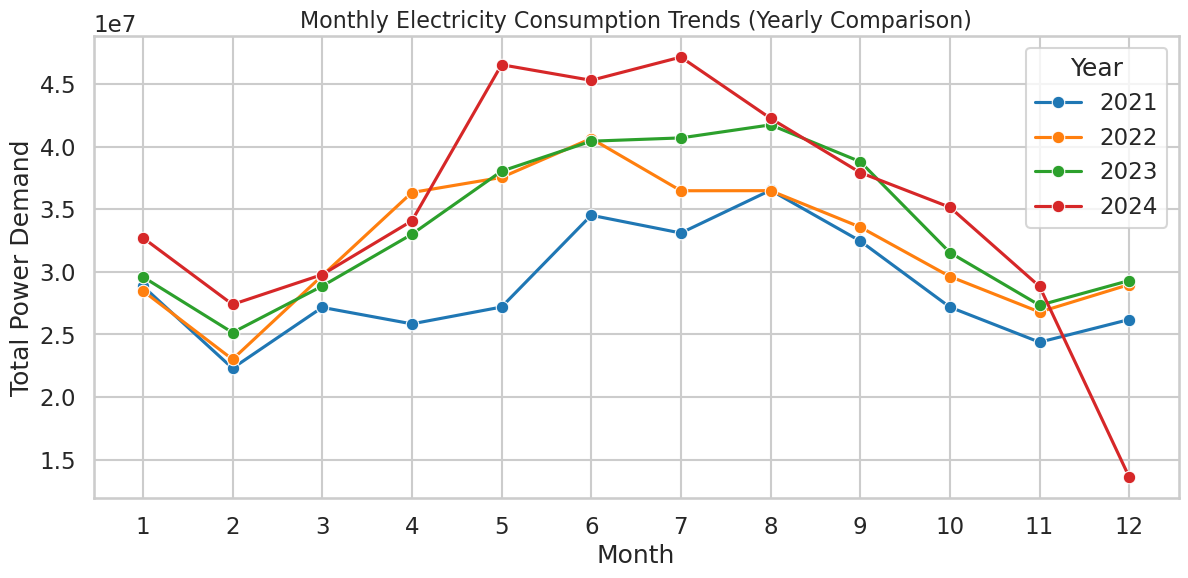

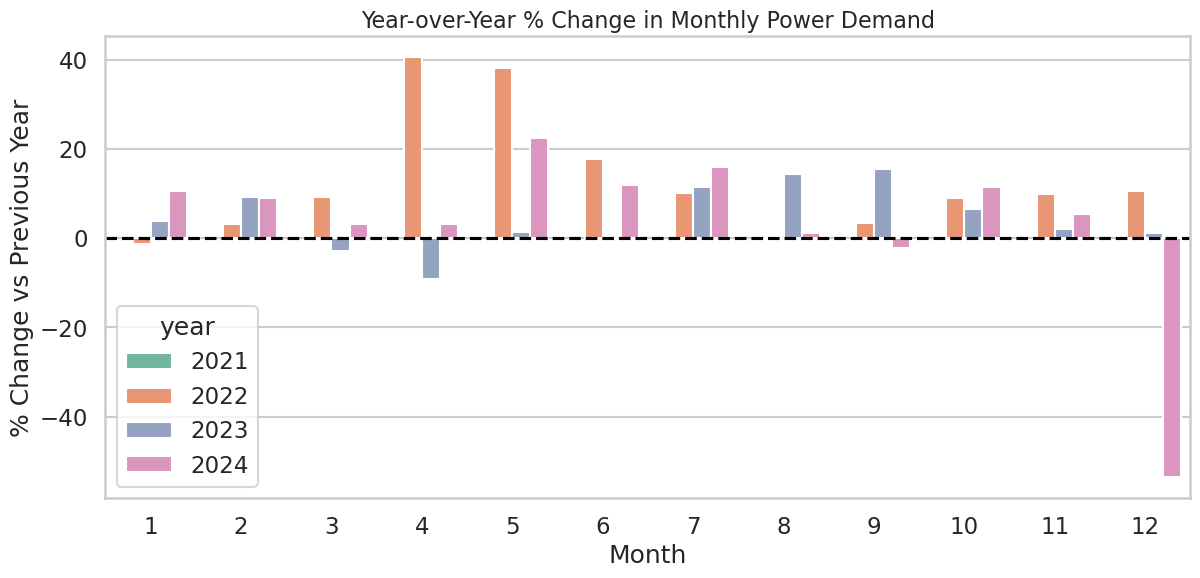

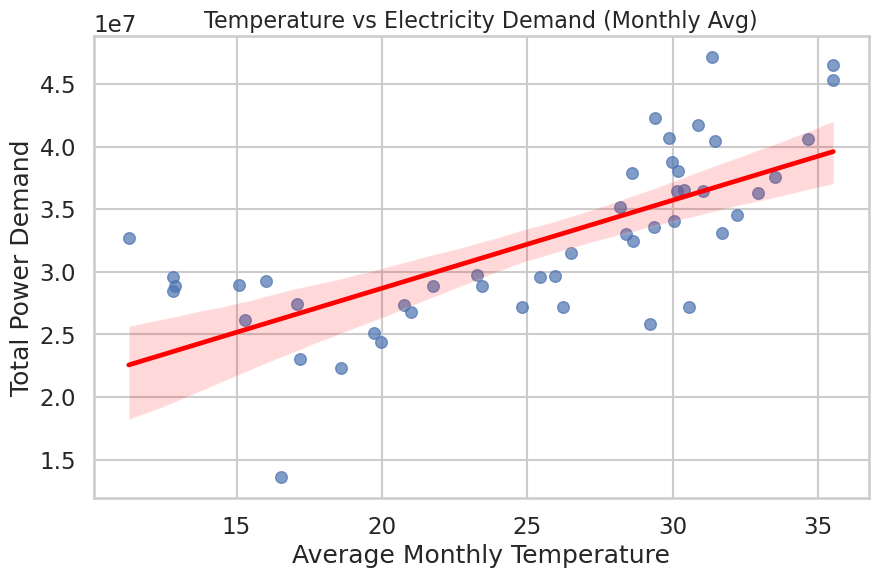

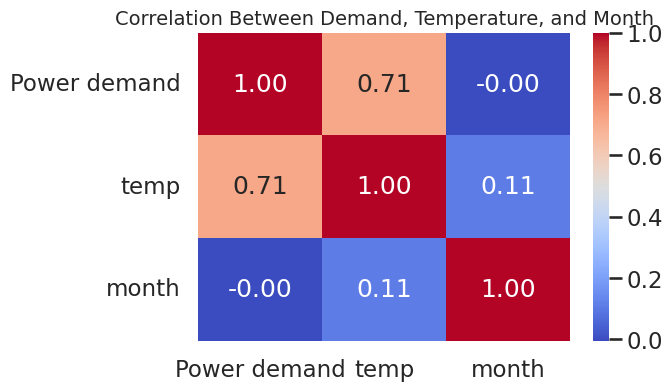

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 📌 Setup
sns.set(style="whitegrid", context="talk")

# --- 1️⃣ Group data by year + month ---
monthly_df = (
    df.groupby(["year", "month"])
    .agg({
        "Power demand": "sum",
        "temp": "mean"
    })
    .reset_index()
)

# --- 2️⃣ Line plot: Monthly consumption trends ---
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_df,
    x="month", y="Power demand", hue="year", marker="o", palette="tab10"
)
plt.title("Monthly Electricity Consumption Trends (Yearly Comparison)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Power Demand")
plt.legend(title="Year")
plt.xticks(range(1, 13))
plt.show()

# --- 4️⃣ YoY % change per month ---
monthly_df["pct_change"] = monthly_df.groupby("month")["Power demand"].pct_change() * 100
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_df, x="month", y="pct_change", hue="year", palette="Set2"
)
plt.title("Year-over-Year % Change in Monthly Power Demand", fontsize=16)
plt.xlabel("Month")
plt.ylabel("% Change vs Previous Year")
plt.axhline(0, color="black", linestyle="--")
plt.show()

# --- 7️⃣ Temperature vs Demand correlation ---
plt.figure(figsize=(10, 6))
sns.regplot(
    data=monthly_df, x="temp", y="Power demand", scatter_kws={"s": 70, "alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("Temperature vs Electricity Demand (Monthly Avg)", fontsize=16)
plt.xlabel("Average Monthly Temperature")
plt.ylabel("Total Power Demand")
plt.show()

# --- 8️⃣ Correlation heatmap (temp vs demand vs month) ---
corr = monthly_df[["Power demand", "temp", "month"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Demand, Temperature, and Month", fontsize=14)
plt.show()

In [84]:
# ===== ADVANCED FEATURE ENGINEERING FOR BETTER PREDICTION ACCURACY =====

# 1. Create time-based features
df['hour'] = df['datetime'].dt.hour
df['quarter'] = df['datetime'].dt.quarter
df['week_of_year'] = df['datetime'].dt.isocalendar().week
# 2. Create cyclical features (important for time series)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 3. Lag features (previous values impact current demand)
df = df.sort_values('datetime').reset_index(drop=True) 
for lag in [1,24]:  # 1h, 2h, 3h, 6h, 12h, 1day, 1week lags
    df[f'power_lag_{lag}'] = df['Power demand'].shift(lag)
    df[f'temp_lag_{lag}'] = df['temp'].shift(lag)

# 4. Rolling statistics (trend and seasonality indicators)
for window in [3,24]:  
    df[f'power_rolling_mean_{window}'] = df['Power demand'].rolling(window=window, min_periods=1).mean()
    

# 5. Interaction features
df['temp_hour_interaction'] = df['temp'] * df['hour']

df.fillna(method='bfill', inplace=True)
df.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,quarter,week_of_year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0,0,0,1,53,0.000000,1.000000,-0.433884,-0.900969,0.5,0.866025,11853.25,8.0,11853.25,8.0,11853.250000,11853.250,0.0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0,0,1,1,53,0.258819,0.965926,-0.433884,-0.900969,0.5,0.866025,11853.25,8.0,11853.25,8.0,16760.165000,16760.165,8.0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0,0,2,1,53,0.500000,0.866025,-0.433884,-0.900969,0.5,0.866025,21667.08,8.0,11853.25,8.0,17837.100000,17837.100,15.0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0,0,3,1,53,0.707107,0.707107,-0.433884,-0.900969,0.5,0.866025,19990.97,7.5,11853.25,8.0,20315.343333,18199.820,21.0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0,0,4,1,53,0.866025,0.500000,-0.433884,-0.900969,0.5,0.866025,19287.98,7.0,11853.25,8.0,19799.096667,18583.524,26.0


In [85]:
df.columns

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday', 'hour', 'quarter', 'week_of_year',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'power_lag_1', 'temp_lag_1', 'power_lag_24', 'temp_lag_24',
       'power_rolling_mean_3', 'power_rolling_mean_24',
       'temp_hour_interaction'],
      dtype='object')

In [86]:
df.describe()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,quarter,week_of_year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
count,33074,33074.000000,33074.00000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.0,3.307400e+04,3.307400e+04,33074.000000,33074.000000,3.307400e+04,3.307400e+04,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000
mean,2022-12-26 13:44:41.441615872,47115.926601,25.51463,2022.490627,6.453649,15.749531,3.001935,0.287265,0.031626,11.262412,2.488994,26.301899,1.495754e-02,-1.249240e-02,-0.002601,0.001260,-4.992318e-03,-1.383508e-02,47115.836509,25.514500,47095.454489,25.510758,47115.747803,47110.531406,299.733073
min,2021-01-01 00:00:00,2297.490000,4.50000,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,2297.490000,4.500000,2297.490000,4.500000,11196.930000,11853.250000,0.000000
25%,2021-12-30 17:15:00,36601.122500,19.80000,2021.000000,3.000000,8.000000,1.000000,0.000000,0.000000,5.000000,1.000000,13.0,-7.071068e-01,-7.071068e-01,-0.781831,-0.900969,-8.660254e-01,-8.660254e-01,36601.122500,19.800000,36586.275000,19.800000,36699.410000,35616.538021,104.000000
50%,2023-01-03 05:30:00,45689.270000,27.00000,2023.000000,6.000000,16.000000,3.000000,0.000000,0.000000,11.000000,2.000000,26.0,1.224647e-16,-1.836970e-16,0.000000,-0.222521,1.224647e-16,-1.836970e-16,45689.270000,27.000000,45677.860000,27.000000,45563.620000,43861.966458,278.400000
75%,2023-12-17 21:45:00,58055.917500,31.10000,2023.000000,9.000000,23.000000,5.000000,1.000000,0.000000,17.000000,3.000000,39.0,7.071068e-01,7.071068e-01,0.781831,0.623490,5.000000e-01,5.000000e-01,58055.917500,31.100000,58055.917500,31.100000,57872.358333,57833.125521,474.000000
max,2024-12-12 00:00:00,102781.620000,46.20000,2024.000000,12.000000,31.000000,6.000000,1.000000,1.000000,23.000000,4.000000,53.0,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00,102781.620000,46.200000,102781.620000,46.200000,101332.580000,88358.191250,895.160000
std,NaN,15673.385374,7.95123,1.109760,3.414038,8.781877,2.002009,0.452493,0.175005,6.843693,1.112058,14.884161,7.086287e-01,7.053338e-01,0.707288,0.706941,7.112143e-01,7.028429e-01,15673.579507,7.951481,15699.367020,7.957969,15264.222257,13070.275375,213.525013


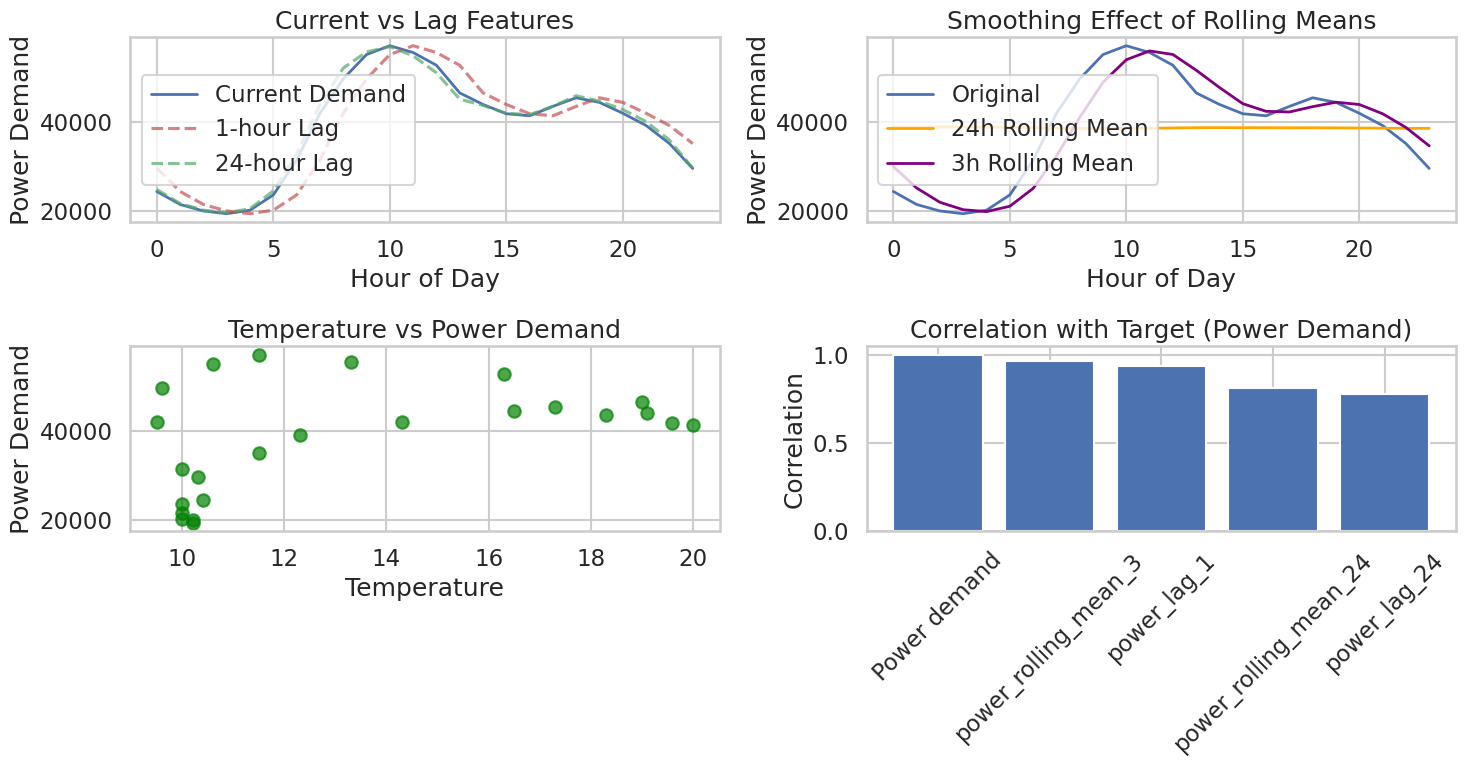


=== CORRELATION WITH TARGET ===
Power demand             1.000
power_rolling_mean_3     0.968
power_lag_1              0.940
power_rolling_mean_24    0.812
power_lag_24             0.778
Name: Power demand, dtype: float64


In [87]:
# ===== PRACTICAL EXAMPLE: Understanding Lag and Rolling Features =====

# Let's look at a specific time period to understand these features
example_data = df[df['datetime'].dt.date == pd.to_datetime('2021-01-15').date()].copy()

# Add hour feature for plotting (extract from datetime)
example_data['hour'] = example_data['datetime'].dt.hour

# Create a comparison DataFrame showing original vs engineered features
available_columns = ['datetime', 'Power demand', 'power_lag_1', 'power_lag_24']
if 'power_rolling_mean_24' in df.columns:
    available_columns.append('power_rolling_mean_24')

comparison_df = example_data[available_columns].head(10)

# Visualize the relationship
plt.figure(figsize=(15, 8))

# Plot 1: Original vs Lag features
plt.subplot(2, 2, 1)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Current Demand', linewidth=2)
plt.plot(example_data['hour'], example_data['power_lag_1'], 'r--', label='1-hour Lag', alpha=0.7)
plt.plot(example_data['hour'], example_data['power_lag_24'], 'g--', label='24-hour Lag', alpha=0.7)
plt.title('Current vs Lag Features')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 2: Rolling mean smoothing effect (if available)
plt.subplot(2, 2, 2)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Original', linewidth=2)
if 'power_rolling_mean_24' in example_data.columns:
    plt.plot(example_data['hour'], example_data['power_rolling_mean_24'], 'orange', label='24h Rolling Mean', linewidth=2)
if 'power_rolling_mean_3' in example_data.columns:
    plt.plot(example_data['hour'], example_data['power_rolling_mean_3'], 'purple', label='3h Rolling Mean', linewidth=2)
plt.title('Smoothing Effect of Rolling Means')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 3: Temperature vs Power Demand
plt.subplot(2, 2, 3)
if 'temp' in example_data.columns:
    plt.scatter(example_data['temp'], example_data['Power demand'], alpha=0.7, color='green')
    plt.xlabel('Temperature')
    plt.ylabel('Power Demand')
    plt.title('Temperature vs Power Demand')
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'Temperature data not available', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title('Temperature Analysis (Not Available)')

# Plot 4: Correlation with target (using available features)
plt.subplot(2, 2, 4)
correlation_features = ['Power demand', 'power_lag_1', 'power_lag_24']
if 'power_rolling_mean_24' in df.columns:
    correlation_features.append('power_rolling_mean_24')
if 'power_rolling_mean_3' in df.columns:
    correlation_features.append('power_rolling_mean_3')

correlations = df[correlation_features].corr()['Power demand'].sort_values(ascending=False)
plt.bar(range(len(correlations)), correlations.values)
plt.xticks(range(len(correlations)), correlations.index, rotation=45)
plt.title('Correlation with Target (Power Demand)')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n=== CORRELATION WITH TARGET ===")
print(correlations.round(3))

In [88]:
df

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,quarter,week_of_year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
0,2021-01-01 00:00:00,11853.25,8.000000,2021,1,1,4,0,0,0,1,53,0.000000,1.000000,-0.433884,-0.900969,5.000000e-01,0.866025,11853.25,8.000000,11853.25,8.0,11853.250000,11853.250000,0.000000
1,2021-01-01 01:00:00,21667.08,8.000000,2021,1,1,4,0,0,1,1,53,0.258819,0.965926,-0.433884,-0.900969,5.000000e-01,0.866025,11853.25,8.000000,11853.25,8.0,16760.165000,16760.165000,8.000000
2,2021-01-01 02:00:00,19990.97,7.500000,2021,1,1,4,0,0,2,1,53,0.500000,0.866025,-0.433884,-0.900969,5.000000e-01,0.866025,21667.08,8.000000,11853.25,8.0,17837.100000,17837.100000,15.000000
3,2021-01-01 03:00:00,19287.98,7.000000,2021,1,1,4,0,0,3,1,53,0.707107,0.707107,-0.433884,-0.900969,5.000000e-01,0.866025,19990.97,7.500000,11853.25,8.0,20315.343333,18199.820000,21.000000
4,2021-01-01 04:00:00,20118.34,6.500000,2021,1,1,4,0,0,4,1,53,0.866025,0.500000,-0.433884,-0.900969,5.000000e-01,0.866025,19287.98,7.000000,11853.25,8.0,19799.096667,18583.524000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,2024-12-11 19:00:00,46661.53,15.400000,2024,12,11,2,0,0,19,4,50,-0.965926,0.258819,0.974928,-0.222521,-2.449294e-16,1.000000,49063.47,16.600000,44904.16,15.8,48016.403333,41238.880000,292.600000
33070,2024-12-11 20:00:00,42853.73,14.200000,2024,12,11,2,0,0,20,4,50,-0.866025,0.500000,0.974928,-0.222521,-2.449294e-16,1.000000,46661.53,15.400000,43495.92,14.8,46192.910000,41212.122083,284.000000
33071,2024-12-11 21:00:00,39826.89,13.350000,2024,12,11,2,0,0,21,4,50,-0.707107,0.707107,0.974928,-0.222521,-2.449294e-16,1.000000,42853.73,14.200000,43169.12,13.8,43114.050000,41072.862500,280.350000
33072,2024-12-11 22:00:00,28541.40,12.966667,2024,12,11,2,0,0,22,4,50,-0.500000,0.866025,0.974928,-0.222521,-2.449294e-16,1.000000,39826.89,13.350000,44692.85,13.1,37074.006667,40399.885417,285.266667


# Machine Learning Pipeline for Energy Demand Prediction

Now we'll create a comprehensive ML pipeline with proper scaling, feature selection, and model training to predict power demand.

In [89]:
# ===== STEP 1: DATA PREPARATION AND FEATURE SELECTION =====

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== DATA PREPARATION ===")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

# Select features for ML model (exclude datetime and target)
feature_columns = [col for col in df.columns if col not in ['datetime', 'Power demand']]
target_column = 'Power demand'

# Prepare feature matrix and target vector
X = df[feature_columns].copy()
y = df[target_column].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

=== DATA PREPARATION ===
Dataset shape: (33074, 25)
Date range: 2021-01-01 00:00:00 to 2024-12-12 00:00:00

Feature matrix shape: (33074, 23)
Target vector shape: (33074,)


In [90]:
# ===== FEATURE SELECTION: TOP 15 CORRELATED FEATURES =====

print("=== FEATURE SELECTION BASED ON CORRELATION ===")

# Get correlation with target variable
correlations = df.corr()['Power demand'].sort_values(ascending=False)
print(correlations)

# Select top 15 features (excluding the target itself)
top_features = correlations.drop('Power demand').head(15)
print(top_features)

# Get the feature names
selected_features = top_features.index.tolist()
print(f"\nSelected feature names: {selected_features}")

# Create new dataset with only selected features
X_selected = df[selected_features].copy()
y_selected = df['Power demand'].copy()

print(f"\nReduced dataset shape: {X_selected.shape}")

=== FEATURE SELECTION BASED ON CORRELATION ===
Power demand             1.000000
power_rolling_mean_3     0.967947
power_lag_1              0.939952
power_rolling_mean_24    0.811831
power_lag_24             0.777902
temp                     0.469566
temp_lag_24              0.456735
temp_lag_1               0.455846
temp_hour_interaction    0.327741
datetime                 0.239396
year                     0.235676
hour                     0.184563
day_sin                  0.050723
month                    0.038331
quarter                  0.034499
week_of_year             0.031460
date                     0.024147
day_cos                 -0.016377
is_holiday              -0.037802
day                     -0.039269
is_weekend              -0.048075
month_sin               -0.172567
hour_sin                -0.209607
hour_cos                -0.232562
month_cos               -0.391782
Name: Power demand, dtype: float64
power_rolling_mean_3     0.967947
power_lag_1              0.939952


In [91]:
# ===== TRAIN-TEST SPLIT WITH SELECTED FEATURES =====

X_selected_processed = X_selected.copy()
if 'datetime' in X_selected_processed.columns:
    X_selected_processed['datetime'] = pd.to_numeric(pd.to_datetime(X_selected_processed['datetime']))

# Split the data with selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected_processed, y_selected, test_size=0.2, random_state=42
)

print(f"Training set with selected features: {X_train_selected.shape}")
print(f"Testing set with selected features: {X_test_selected.shape}")

scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

Training set with selected features: (26459, 15)
Testing set with selected features: (6615, 15)


In [92]:
# ===== GRADIENT BOOSTING WITH SELECTED FEATURES =====

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

print("=== GRADIENT BOOSTING WITH TOP 15 FEATURES ===")

# Initialize Gradient Boosting model with optimal parameters
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    subsample=0.8
)

# Train the model
print("Training Gradient Boosting model...")
gb_model.fit(X_train_selected, y_train_selected)

# Make predictions
y_train_pred_gb = gb_model.predict(X_train_selected)
y_test_pred_gb = gb_model.predict(X_test_selected)

# Calculate comprehensive metrics
train_rmse_gb = np.sqrt(mean_squared_error(y_train_selected, y_train_pred_gb))
test_rmse_gb = np.sqrt(mean_squared_error(y_test_selected, y_test_pred_gb))
train_mae_gb = mean_absolute_error(y_train_selected, y_train_pred_gb)
test_mae_gb = mean_absolute_error(y_test_selected, y_test_pred_gb)
train_r2_gb = r2_score(y_train_selected, y_train_pred_gb)
test_r2_gb = r2_score(y_test_selected, y_test_pred_gb)

# Calculate MAPE (Mean Absolute Percentage Error)
train_mape_gb = np.mean(np.abs((y_train_selected - y_train_pred_gb) / y_train_selected)) * 100
test_mape_gb = np.mean(np.abs((y_test_selected - y_test_pred_gb) / y_test_selected)) * 100

# Calculate Regression Accuracy (R² as percentage)
test_accuracy_percentage_gb = test_r2_gb * 100

print("🚀 GRADIENT BOOSTING RESULTS WITH TOP 15 FEATURES")
print(f"Train RMSE: {train_rmse_gb:.2f}")
print(f"Test RMSE: {test_rmse_gb:.2f}")
print(f"Train MAE: {train_mae_gb:.2f}")
print(f"Test MAE: {test_mae_gb:.2f}")
print(f"Train R²: {train_r2_gb * 100:.2f}%")
print(f"Test R²: {test_r2_gb * 100:.2f}%")
print(f"Train MAPE: {train_mape_gb:.2f}%")
print(f"Test MAPE: {test_mape_gb:.2f}%")
print(f"Test Accuracy (R²): {test_accuracy_percentage_gb:.2f}%")

=== GRADIENT BOOSTING WITH TOP 15 FEATURES ===
Training Gradient Boosting model...
🚀 GRADIENT BOOSTING RESULTS WITH TOP 15 FEATURES
Train RMSE: 2473.47
Test RMSE: 2641.56
Train MAE: 1558.58
Test MAE: 1599.95
Train R²: 97.50%
Test R²: 97.20%
Train MAPE: 3.94%
Test MAPE: 4.20%
Test Accuracy (R²): 97.20%
🚀 GRADIENT BOOSTING RESULTS WITH TOP 15 FEATURES
Train RMSE: 2473.47
Test RMSE: 2641.56
Train MAE: 1558.58
Test MAE: 1599.95
Train R²: 97.50%
Test R²: 97.20%
Train MAPE: 3.94%
Test MAPE: 4.20%
Test Accuracy (R²): 97.20%


In [93]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
)
# Train the model
print("Training Random Forest model...")
rf_model.fit(X_train_selected, y_train_selected)
# Make predictions
y_train_pred_rf = rf_model.predict(X_train_selected)
y_test_pred_rf = rf_model.predict(X_test_selected)
# Calculate comprehensive metrics
train_rmse_rf = np.sqrt(mean_squared_error(y_train_selected, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test_selected, y_test_pred_rf))
train_mae_rf = mean_absolute_error(y_train_selected, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test_selected, y_test_pred_rf)
train_r2_rf = r2_score(y_train_selected, y_train_pred_rf)
test_r2_rf = r2_score(y_test_selected, y_test_pred_rf)
# Calculate MAPE (Mean Absolute Percentage Error)
train_mape_rf = np.mean(np.abs((y_train_selected - y_train_pred_rf) / y_train_selected)) * 100
test_mape_rf = np.mean(np.abs((y_test_selected - y_test_pred_rf) / y_test_selected)) * 100
# Calculate Regression Accuracy (R² as percentage)
test_accuracy_percentage_rf = test_r2_rf * 100  
print("🚀 RANDOM FOREST RESULTS WITH TOP 15 FEATURES")
print(f"Train RMSE: {train_rmse_rf:.2f}")
print(f"Test RMSE: {test_rmse_rf:.2f}")
print(f"Train MAE: {train_mae_rf:.2f}")
print(f"Test MAE: {test_mae_rf:.2f}")
print(f"Train R²: {train_r2_rf * 100:.2f}%")
print(f"Test R²: {test_r2_rf * 100:.2f}%")
print(f"Train MAPE: {train_mape_rf:.2f}%")
print(f"Test MAPE: {test_mape_rf:.2f}%")
print(f"Test Accuracy (R²): {test_accuracy_percentage_rf:.2f}%")

Training Random Forest model...
🚀 RANDOM FOREST RESULTS WITH TOP 15 FEATURES
Train RMSE: 3884.83
Test RMSE: 4007.39
Train MAE: 2598.28
Test MAE: 2655.60
Train R²: 93.83%
Test R²: 93.57%
Train MAPE: 6.64%
Test MAPE: 7.02%
Test Accuracy (R²): 93.57%
🚀 RANDOM FOREST RESULTS WITH TOP 15 FEATURES
Train RMSE: 3884.83
Test RMSE: 4007.39
Train MAE: 2598.28
Test MAE: 2655.60
Train R²: 93.83%
Test R²: 93.57%
Train MAPE: 6.64%
Test MAPE: 7.02%
Test Accuracy (R²): 93.57%
